# Final Project

# 1. Description of the problem and a discussion of the background

The aim of this project is to develop the best model to predict the median house value for California districts.

The Southern California median home price dipped slightly in March from a year earlier, the first annual decrease since 2012 and a sign of a remarkable downshift from the once-sizzling regional housing market.

The 0.1% drop, reported Friday by CoreLogic, means prices for the six-county region were essentially flat year-over-year. But given a pullback in previous months, prices are \\$18,500 off their June 2018 peak, and that raises the possibility of a sustained decline in the months ahead.

The median price for new and resale houses and condos — the point at which half the homes sold for more and half for less — was \\$518,500 in March, \\$500 less than a year earlier and off the all-time high of \\$537,000 reached in June.

The dip from March 2018 doesn’t mean values declined across the board. In fact, when broken down by county, the median dropped only in Orange County, while remaining areas — including Los Angeles County — still posted a slight or modest increase compared with a year earlier.

Sales, however, continued their declines across the board and have now dropped in each county for at least eight consecutive months. Sales for the region fell 14.1% in March.

If prices follow and enter into a tailspin, many buyers struggling to afford a home would rejoice — provided it wasn’t accompanied by an economic downturn and return to high joblessness.

# 1.1. Description of the data and how it will be used to solve the problem.

This dataset was derived from the U.S. census, using one row per census block group.
A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The target variable ['y'] is the median house value for California districts.

Some features of the data set are the age of the house, the average number of rooms or the average number of bedrooms. The data contains the geographical position as latitude and longitude.

Workflow:
1. First the data will be imported into Jupyter Notebook and displayed.
2. Afterwards just small number of the data points will be visualized in folium.Map because of performance issues.
3. Next the hole data set will be shown as scatter plot with highlighting the house price.
4. The data will be processed via STD scalar and split into train and test set for training the individual models. The performance of each model will be tested with the test data set through the Rsquare score.
5. The best model will be used to show the Residuals Plot

# 2.0. Report

## Introduction

The aim of this project is to develop the best model to predict the median house value for California districts.

2.1.1 Import data

2.1.2 Visualiation 

2.2   Methodology

      Scatter plot
      
      Train-Test-Split
      
      STD-Scaler
      
2.3.1 Results

      LinearRegression
      
      KNN REGRSSOR
      
      RANDOM FOREST REGRESSOR
      
      SVM REGRESSOR
      
      GRADIENT BOOSTING REGRESSOR
       
2.4   Discussion

3.0   Presentation




## 2.1.1. Data Import

In [1]:
import numpy as np
import pandas as pd 

Import Data:

In [2]:
from sklearn.datasets import fetch_california_housing 
cal_housing = fetch_california_housing() 
x, y = cal_housing.data, cal_housing.target 
 
df = pd.DataFrame(data=x, columns=cal_housing.feature_names) 
df["y"] = y 
df.head() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
y             20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


## 2.1.2. Data Visualisation

In [4]:
!pip install folium

     |████████████████████████████████| 92kB 15.4MB/s eta 0:00:01


In [5]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
latitude="36.7477"
longitude="-119.7723"

In [16]:
# create map of just first 2000 data points latitude and longitude values
map_CA = folium.Map(location=[latitude, longitude], zoom_start=5, height=600, width=800)

# add markers to map
for lat, lng, label in zip(df['Latitude'][:2000], df['Longitude'][:2000], df['y'][:2000]):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_CA)  
    
map_CA

## 2.2. Methodology

Folium.Map can not render the hole data set, so a scatter plot is used to show the distribution of house prices.

The higher house prices in red for San Francisco and Los Angeles are easy to see.

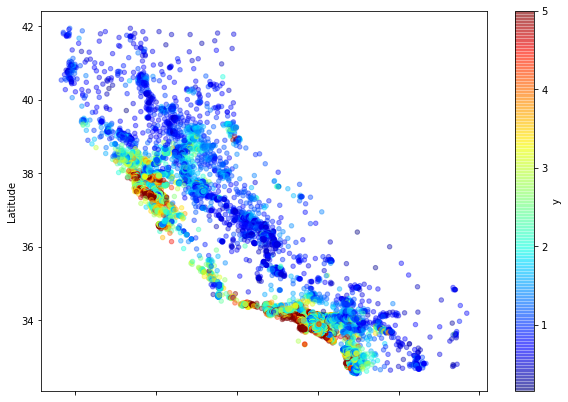

In [7]:
import matplotlib.pyplot as plt 
#from sklearn.model_selection import * 
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4, 
    figsize=(10,7), c="y", cmap=plt.get_cmap("jet"), colorbar=True) 
plt.show()

Processing the data

In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
#Train-Test-Split 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3) 

In [12]:
#STD Scaler 
from sklearn.preprocessing import * 
scaler = StandardScaler() 
scaler.fit(x_train) 
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

## 2.3.1. Results

Compare R2 for each Model

In [13]:
#LINEAR REGRESSION: 
from sklearn.linear_model import LinearRegression 
#from sklearn.metrics import mean_squared_error 
from sklearn.metrics import * 
lin = LinearRegression() 
lin.fit(x_train, y_train) 

y_pred = lin.predict(x_test) 
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 
print("R2: ", round(r2,4)) 
print("MSE: ", round(mse,4)) 

R2:  0.5958
MSE:  0.5306


In [14]:
#KNN REGRSSOR
from sklearn.neighbors import KNeighborsRegressor 
for i in [3,5,10,20]: 
    regr = KNeighborsRegressor(n_neighbors=i) 
    regr.fit(x_train,y_train) 

    y_pred = regr.predict(x_test) 
    r2 = r2_score(y_test, y_pred) 
    mse = mean_squared_error(y_test, y_pred) 
    print(i,"-k with R2: ", round(r2,4), " MSE: ", round(mse,4))

3 -k with R2:  0.6504  MSE:  0.4589
5 -k with R2:  0.6728  MSE:  0.4295
10 -k with R2:  0.6858  MSE:  0.4125
20 -k with R2:  0.6817  MSE:  0.4178


In [19]:
#RANDOM FOREST REGRESSOR 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1) 
rfr.fit(x_train,y_train) 
y_pred = rfr.predict(x_test) 
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 
print("R2: ", round(r2,4)) 
print("MSE: ", round(mse,4)) 

R2:  0.7769
MSE:  0.2928


In [12]:
#SVM REGRESSOR 
from sklearn.svm import SVR 
regr=SVR(kernel="rbf") 
regr.fit(x_train,y_train) 
y_pred=regr.predict(x_test) 
mse=mean_squared_error(y_test,y_pred) 
r2=regr.score(x_test,y_test) 
print("R2: ",round(r2,4)) 
print("MSE: ",round(mse,4)) 

R2:  0.7337
MSE:  0.3496


In [17]:
#GRADIENT BOOSTING REGRESSOR 
from sklearn.ensemble import GradientBoostingRegressor 
clf= GradientBoostingRegressor(n_estimators=100) 
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test) 
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 
print("R2: ", round(r2,4)) 
print("MSE: ", round(mse,4)) 

R2:  0.7803
MSE:  0.2883


In [10]:
#Include GridSearch for GRADIENT BOOSTING REGRESSOR 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import GridSearchCV 
parameters = {'n_estimators': [100, 150, 200], 'max_depth': [2, 5, 7], 'learning_rate': [0.01, 0.03]} 
boost = GradientBoostingRegressor() 
clf = GridSearchCV(boost, parameters, cv=4, n_jobs=-1) 
clf.fit(x_train, y_train) 
print("Best parameters set found on development set: ", clf.best_params_,) 
print("Best score: ",round(clf.best_score_,4))

Best parameters set found on development set:  {'learning_rate': 0.03, 'max_depth': 7, 'n_estimators': 200}
Best score:  0.8196


## 2.3.2. Comparison of all models

|        Model              |    Score   |   Note  |
|---------------------------|------------|---------|  
|  LinearRegression         |  0.5958    |         |
|  KNN Regressor            |  0.6858    |   k=10  |
|  RANDOM FOREST REGR       |  0.7769    |         |
|  SVM REGR                 |  0.7337    |         |
|  GRADIENT BOOSTING REGR   |  0.7803    |         |
|  GRADIENT BOOSTING + Grid |  0.8196    |         |

Looking at the comparison of the performance of the different models it is clear they are very different.
For this complex data set a simple linear regression or KNN regressor is not suited both have a Rsquare of below 70%.
The best result in this analysis could be achieved with grid search (which includes a cross validation of k=4) with the gradient boosting regressor.

## 2.4. Discussion

This work shows that is necessary to compare different models. Especially if a complex data set is provided as shown.
Finally, it is possible to predict the house price in the California districts.  

Best model in this case ist Gradient Boosting Regressor

In [22]:
clf= GradientBoostingRegressor(n_estimators=200, max_depth=7, learning_rate=0.03) 
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test) 
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 
print("R2: ", round(r2,4)) 
print("MSE: ", round(mse,4)) 

R2:  0.8228
MSE:  0.2326


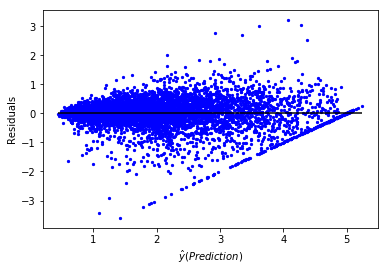

In [15]:
#Residuals Plot for Best Model: 
regr = GradientBoostingRegressor(n_estimators=200, max_depth=7, learning_rate=0.03) 
regr.fit(x_train, y_train) 
y_pred = regr.predict(x_test) 
min_val = min(y_pred) 
max_val = max(y_pred) 
plt.scatter(y_pred, y_pred - y_test, color="blue", s=5) 
plt.hlines(y = 0, xmin =min_val, xmax=max_val) 
plt.xlabel("$\hat{y} (Prediction)$") 
plt.ylabel("Residuals") 
plt.show() 

The result which is shown in the residual plot is good because the majority of the points is in the interval of +1 and -1.
Some points in the residual plots seems to be on an additional straight line which is the case also for other models (not shown) and must be so an artefact of the STD scaler.

## 3.0. Presentation

Please copy and past in your browser and scroll down:

https://sway.office.com/mLjwwDfMa1snAwUs?ref=Link